In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
def extract_info(filename):
  pieces = filename.split('_')
  return {
      'nodes': pieces[3][5:],
      'k': pieces[4][1:],
      'population': pieces[5][1:], 
      'generations': pieces[6][1:],
      'mutation': pieces[7][2:],
      'crossover': pieces[8][2:],
      'elitism': pieces[9][2:],
      'bias': pieces[10][4:],
      'proximity': pieces[11][4:],
      'trials': pieces[12][6:]
      }

In [32]:
def extract_title(filename):
  info = extract_info(filename)
  title = "Population: %s, Generations %s, Mutation: %s, Cross: %s, Bias: %s, Proximity: %s, Trial %s" % (info['population'], info['generations'], info['mutation'], info['crossover'], info['bias'], info['proximity'], info['trials'])
  return title

In [33]:
def plot_performance(basename, generation=-1, outliers=True, figsize=(22,10)):
  data = pd.read_csv(basename + ".csv", ";");
  data.drop(['genome', 'bn'], axis=1)
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_ylim([-0.01, 0.8])
  if generation != -1:
    data = data[data['generation'] <= generation]
  info = extract_info(basename)
  data.boxplot('score', 'generation', ax=ax, showfliers=outliers)
  ax.set_title("Population %s, Mutations: %s, Crossover: %s, Proximity: %s" % (info['population'], info['mutation'], info['crossover'], info['proximity']))
  return data.max()['score']
  

In [34]:
def plot_test2(*filebasename, outliers=True):
  finaldata = pd.DataFrame()
  for basename in filebasename:
    data = pd.read_csv(basename + ".csv", ";")
    info = extract_info(basename)
    data['info'] = np.full((len(data), 1), "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population']))
    finaldata = finaldata.append(data)

  fig, ax = plt.subplots(figsize=(25,10))
  ax.set_ylim([-0.01, 0.8])
  finaldata.boxplot('robot_max_count', 'info', ax=ax, showfliers=outliers, notch=True)
  return finaldata.max()
  

In [35]:
def plot_test(*filebasename, outliers=True):
  finaldata = pd.DataFrame()
  for basename in filebasename:
    data = pd.read_csv(basename + ".csv", ";")
    info = extract_info(basename)
    data['info'] = np.full((len(data), 1), "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population']))
    finaldata = finaldata.append(data)

  fig, ax = plt.subplots(figsize=(25,10))
  ax.set_ylim([-0.01, 0.8])
  finaldata.boxplot('performance', 'info', ax=ax, showfliers=outliers, notch=True)
  return finaldata.max()
  

In [36]:
def compare(evolve_basename, outliers=False, notch=True, figsize=(25,10)):
  data = pd.read_csv(evolve_basename + ".csv", ";")
  genetic_score = data.drop(['runIndex', 'runScore'], axis=1)

  fig, ax = plt.subplots(figsize=figsize)
  ax.set_ylim([-0.01, 0.8])
  data.boxplot('runScore', 'genomeIndex', ax=ax, showfliers=outliers, notch=notch)
  genetic_score = genetic_score.drop_duplicates()

  title = extract_title(evolve_basename)
  ax.set_title(title)
  ax.scatter(np.asarray(genetic_score['genomeIndex'] + 1),
            np.asarray(genetic_score['geneticScore']),
            c = 'r')

In [66]:
def avg_fitness(evolve_basename,figsize=(20,10), ax=None):
  data = pd.read_csv(evolve_basename + ".csv", ";");
  data = data.drop(['bn', 'genome'], axis=1)
  avg = data.groupby(['generation']).mean()
  if (ax == None):
    fig, ax = plt.subplots(figsize=figsize)
  avg.plot(ax=ax)
  ax.set_title("Avg Fitness\n " + extract_title(evolve_basename))
  ax.grid()
  ax.set_xticks(np.arange(0, 81, step=1))
  return ax


In [170]:
def compare_avg_fitness(*evolves, figsize=(20,10)):
    fig, ax = plt.subplots(figsize=figsize)
    for basename in evolves:
        data = pd.read_csv(basename + ".csv", ";")
        data = data.drop(['bn', 'genome'], axis=1)
        avg = data.groupby(['generation']).mean()
        avg.plot(ax=ax)
    ax.set_title("Compare Avg Fitness\n ")
    ax.grid()
    ax.set_xticks(np.arange(0, 81, step=1))

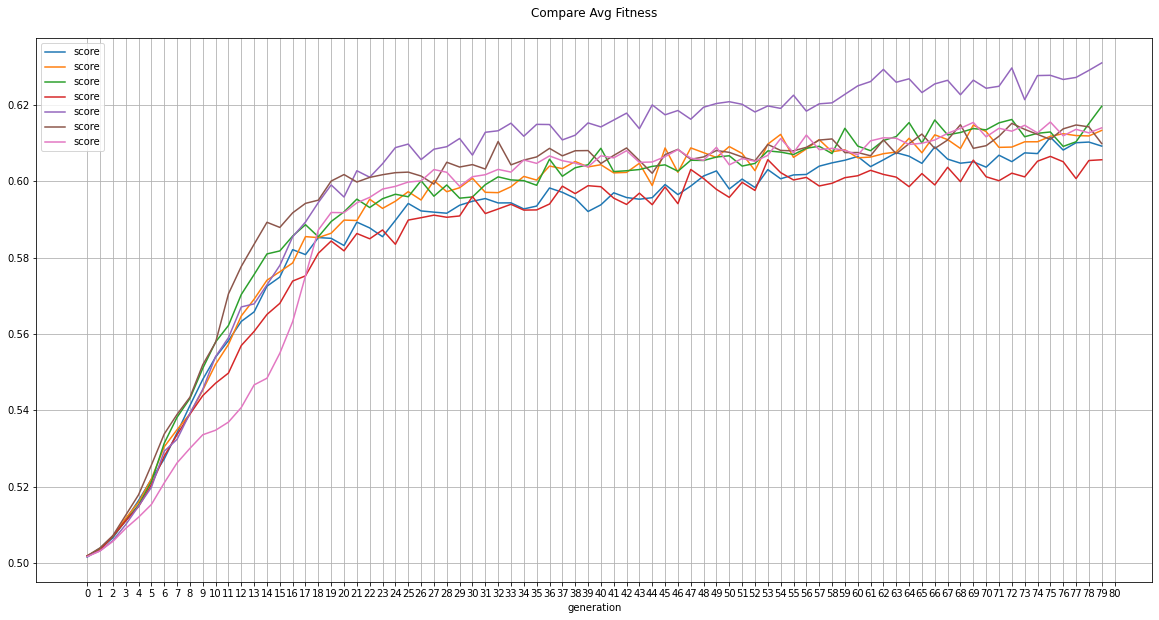

In [192]:
compare_avg_fitness("performance/archivied/evolve_12-03_19-06_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-02_21-56_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-03_07-48_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-03_21-18_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox1.5_trials3",
          "performance/archivied/evolve_12-04_04-16_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/evolve_12-03_23-30_nodes50_k3_p100_g80_pM0.02_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/evolve_12-04_18-37_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3")

trial                                                             29
performance                                                 0.653245
robot_max_count                                             0.633333
info               Prox: 1.5\nGen: 80\nBias: 0.21\nMut: 0.03\nCro...
dtype: object

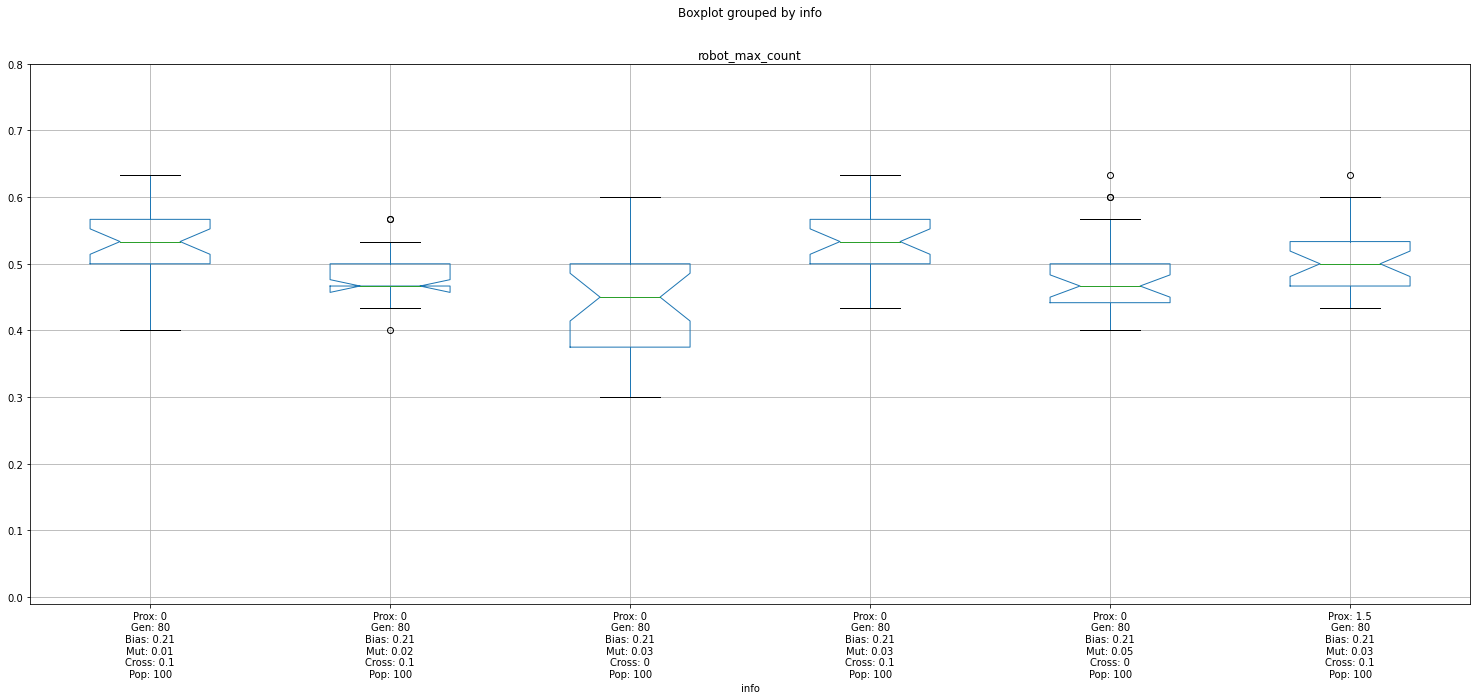

In [163]:
plot_test2("performance/archivied/test_12-03_19-06_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-02_21-56_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-03_07-48_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-03_21-18_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox1.5_trials3",
          "performance/archivied/test_12-04_04-16_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-03_23-30_nodes50_k3_p100_g80_pM0.02_pC0.1_el5_bias0.21_prox0_trials3")
            #"performance/archivied/test_12-04_12-36_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3") ## with tanh

trial                                                             29
performance                                                 0.433333
robot_max_count                                             0.566667
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.05\nCross...
dtype: object

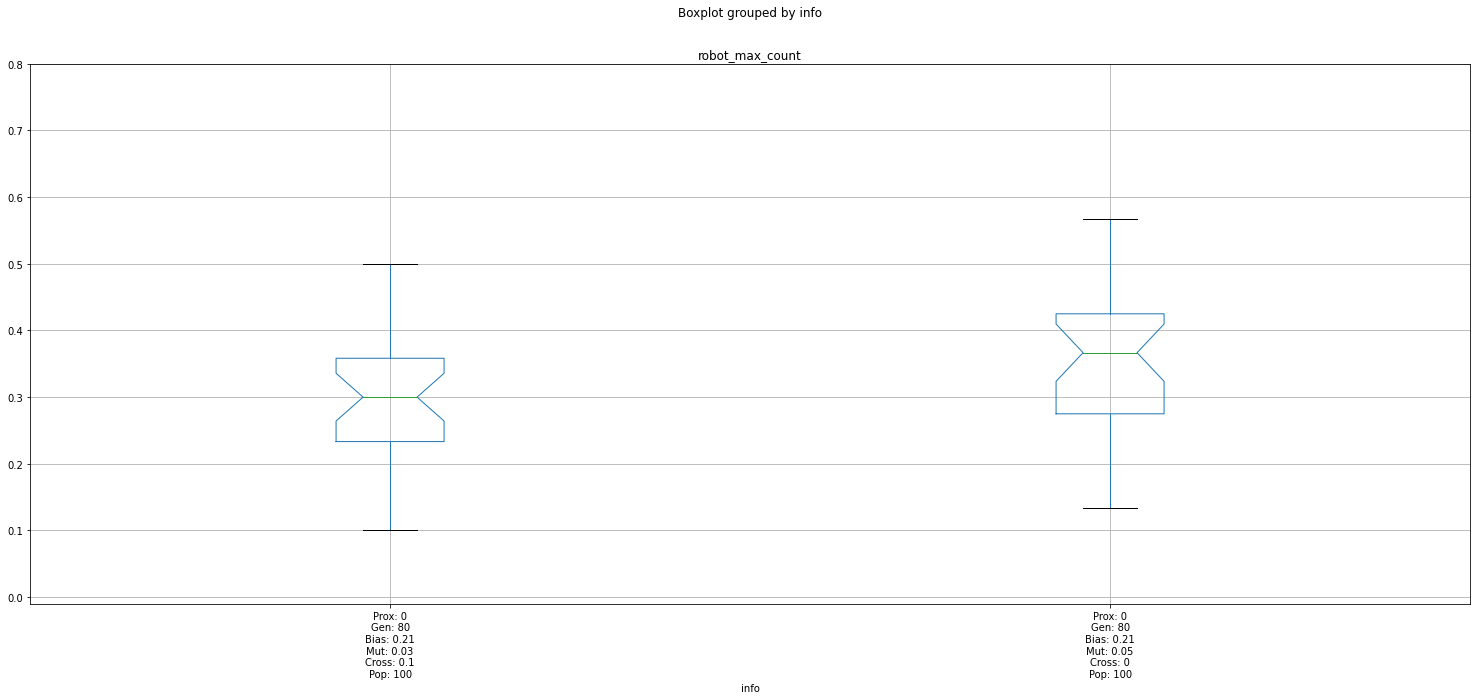

In [162]:
plot_test2("performance/archivied/test_12-04_16-23_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-04_14-26_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3")